# Random Forest Model Prediction - NBA Game Winner-Loser 
## Predictions based on the datasets for NBA Seasons 2002 - 2016

In [3]:
import warnings
warnings.filterwarnings('ignore')
from collections import Counter

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import plotly.express as px
import panel as pn
from panel.interact import interact
from panel import widgets
pn.extension('plotly')
import hvplot.pandas

from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from imblearn.metrics import classification_report_imbalanced

In [4]:
# Read in the first .csv file and select columnsto be included in dataframe. Explanation of columns that will be used as features for the prediction model Random Forest: HT = HOME TEAM, ORBD = OFFENSIVE REBOUND, DRBD = DEFFENSIVE REBOUND, POSS = POSSESSION, TV = TURNOVER

df_2002 = pd.read_csv("data/2002.csv",usecols=['OUTCOME', 'GAME_TIME', 'HT_POSS', 'HT_SCORE_DIFF', 'HT_ORBD', 'HT_DRBD', 'HT_TOV'])

In [5]:
# Show the first dataframe to see the column names 

df_2002.head(5).to_csv("data/dataframe.csv")

In [6]:
# Read in .csv files with data Season 2002-2014 for training

df_2003 = pd.read_csv("data/2003.csv", usecols=['OUTCOME', 'GAME_TIME', 'HT_POSS', 'HT_SCORE_DIFF', 'HT_ORBD', 'HT_DRBD', 'HT_TOV'])
df_2004 = pd.read_csv("data/2004.csv", usecols=['OUTCOME', 'GAME_TIME', 'HT_POSS', 'HT_SCORE_DIFF', 'HT_ORBD', 'HT_DRBD', 'HT_TOV'])
df_2005 = pd.read_csv("data/2005.csv", usecols=['OUTCOME', 'GAME_TIME', 'HT_POSS', 'HT_SCORE_DIFF', 'HT_ORBD', 'HT_DRBD', 'HT_TOV'])
df_2006 = pd.read_csv("data/2006.csv", usecols=['OUTCOME', 'GAME_TIME', 'HT_POSS', 'HT_SCORE_DIFF', 'HT_ORBD', 'HT_DRBD', 'HT_TOV'])
df_2007 = pd.read_csv("data/2007.csv", usecols=['OUTCOME', 'GAME_TIME', 'HT_POSS', 'HT_SCORE_DIFF', 'HT_ORBD', 'HT_DRBD', 'HT_TOV'])
df_2008 = pd.read_csv("data/2008.csv", usecols=['OUTCOME', 'GAME_TIME', 'HT_POSS', 'HT_SCORE_DIFF', 'HT_ORBD', 'HT_DRBD', 'HT_TOV'])
df_2009 = pd.read_csv("data/2009.csv", usecols=['OUTCOME', 'GAME_TIME', 'HT_POSS', 'HT_SCORE_DIFF', 'HT_ORBD', 'HT_DRBD', 'HT_TOV'])
df_2010 = pd.read_csv("data/2010.csv", usecols=['OUTCOME', 'GAME_TIME', 'HT_POSS', 'HT_SCORE_DIFF', 'HT_ORBD', 'HT_DRBD', 'HT_TOV'])
df_2011 = pd.read_csv("data/2011.csv", usecols=['OUTCOME', 'GAME_TIME', 'HT_POSS', 'HT_SCORE_DIFF', 'HT_ORBD', 'HT_DRBD', 'HT_TOV'])
df_2012 = pd.read_csv("data/2012.csv", usecols=['OUTCOME', 'GAME_TIME', 'HT_POSS', 'HT_SCORE_DIFF', 'HT_ORBD', 'HT_DRBD', 'HT_TOV'])
df_2013 = pd.read_csv("data/2013.csv", usecols=['OUTCOME', 'GAME_TIME', 'HT_POSS', 'HT_SCORE_DIFF', 'HT_ORBD', 'HT_DRBD', 'HT_TOV'])
df_2014 = pd.read_csv("data/2014.csv", usecols=['OUTCOME', 'GAME_TIME', 'HT_POSS', 'HT_SCORE_DIFF', 'HT_ORBD', 'HT_DRBD', 'HT_TOV'])


In [7]:
# Read in .csv for data Season 2015-16 that will be used for testing

df_2015 = pd.read_csv("data/2015.csv", usecols=['OUTCOME', 'GAME_TIME', 'HT_POSS', 'HT_SCORE_DIFF', 'HT_ORBD', 'HT_DRBD', 'HT_TOV'])

df_2016 = pd.read_csv("data/2016.csv", usecols=['OUTCOME', 'GAME_TIME', 'HT_POSS', 'HT_SCORE_DIFF', 'HT_ORBD', 'HT_DRBD', 'HT_TOV'])

In [8]:
# Createdataframe for test data

df_test = pd.concat([df_2015, df_2016])

df_test.head()

,OUTCOME,GAME_TIME,HT_POSS,HT_SCORE_DIFF,HT_ORBD,HT_DRBD,HT_TOV
0,1.0,1257.0,0.0,7.0,0.0,0.0,0.0
1,1.0,1258.0,1.0,7.0,0.0,1.0,0.0
2,1.0,1274.0,1.0,7.0,0.0,1.0,0.0
3,1.0,1275.0,0.0,7.0,0.0,1.0,0.0
4,1.0,1285.0,0.0,4.0,0.0,1.0,0.0


In [9]:
# Concat seasons 2002-2014 to create X features dataset (selected rows to match shape of test dataset)

df_train = pd.concat([df_2002, df_2003, df_2004, df_2005, df_2006, df_2007, df_2008, df_2009, df_2010, df_2011, df_2012, df_2013, df_2014])

df_train = df_train.drop(columns='OUTCOME')

X = df_train.iloc[:1161104]

X.head()

,GAME_TIME,HT_POSS,HT_SCORE_DIFF,HT_ORBD,HT_DRBD,HT_TOV
0,2673.0,1.0,-10.0,0.0,0.0,0.0
1,2676.0,1.0,-8.0,0.0,0.0,0.0
2,2676.0,1.0,-8.0,1.0,0.0,0.0
3,2690.0,0.0,-8.0,1.0,0.0,0.0
4,2700.0,1.0,-8.0,1.0,0.0,0.0


In [10]:
X.shape

(1161104, 6)

In [11]:
# Specify season 2015-2016 as y dataset to be predicted

y = df_test['OUTCOME']
y.head()

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: OUTCOME, dtype: float64

In [12]:
y.shape

(1161104,)

In [13]:
# Print binary .pkl files with train and test data that will be used in prediction models. Uncomment if you need to print them.

df_train.to_pickle('data/pkl_nba_data/nba_train_data.pkl')

df_test.to_pickle('data/pkl_nba_data/nba_test_data.pkl')

X.to_pickle('data/pkl_nba_data/X_data.pkl')

y.to_pickle('data/pkl_nba_data/y_data.pkl')

In [14]:
# Check the balance of our target values

y.value_counts()

1.0    679401
0.0    481703
Name: OUTCOME, dtype: int64

In [15]:
# Split the X and y into X_train, X_test, y_train, y_test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

Counter(y_train)

Counter({0.0: 361283, 1.0: 509545})

In [16]:
# Create the StandardScaler instance

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [17]:
# Fit the Standard Scaler with the training data

X_scaler = scaler.fit(X_train)

In [18]:
# Scale the training and testing data

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [19]:
# Resample the training data with the BalancedRandomForestClassifier

from imblearn.ensemble import BalancedRandomForestClassifier

brf_model = BalancedRandomForestClassifier()

brf_model = BalancedRandomForestClassifier(bootstrap=True, class_weight=None,criterion='gini', max_depth=None, max_features='auto',max_leaf_nodes=None, min_impurity_decrease=0.0,min_samples_leaf=2, min_samples_split=2,min_weight_fraction_leaf=0.0,n_estimators=100, n_jobs=1,oob_score=False, random_state=1,replacement=False,sampling_strategy='auto', verbose=0,warm_start=False)

# Fitting the BFR model

brf_model = brf_model.fit(X_train_scaled, y_train)

# Make predictions

predictions_brf = brf_model.predict(X_test_scaled)

In [20]:
# Calculate the balanced accuracy score

bal_acc_score = balanced_accuracy_score(y_test, predictions_brf)
print(f"Balanced Accuracy Score : {bal_acc_score}")

Balanced Accuracy Score : 0.8892515660382707


In [42]:
# Display the confusion matrix

cm_brf = confusion_matrix(y_test, predictions_brf)
cm_brf_df = pd.DataFrame(cm_brf, index=["Actual 0", "Actual 1"],            columns=["Predicted 0", "Predicted 1"])

display(cm_brf_df)

,Predicted 0,Predicted 1
Actual 0,107355,13065
Actual 1,19194,150662


In [120]:
# Print the imbalanced classification report

print("Classification Report")
print(classification_report_imbalanced(y_test, predictions_brf))

Classification Report
                   pre       rec       spe        f1       geo       iba       sup

        0.0       0.85      0.89      0.89      0.87      0.89      0.79    120420
        1.0       0.92      0.89      0.89      0.90      0.89      0.79    169856

avg / total       0.89      0.89      0.89      0.89      0.89      0.79    290276



In [79]:
# List the features sorted in descending order by feature importance

importances = brf_model.feature_importances_
sorted(zip(brf_model.feature_importances_, X.columns), reverse=True)[:6]

[(0.3747638170883058, 'GAME_TIME'),
 (0.17618015774881116, 'HT_SCORE_DIFF'),
 (0.17244448058703626, 'HT_DRBD'),
 (0.1359762040146158, 'HT_ORBD'),
 (0.12389830349222064, 'HT_TOV'),
 (0.016737037069010415, 'HT_POSS')]

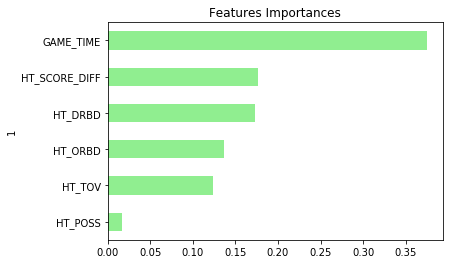

In [111]:
# Visualize the features by importance

importances_df = pd.DataFrame(sorted(zip(brf_model.feature_importances_,    X.columns), reverse=True))[:6]
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)

importances_sorted = importances_df.sort_values(by=
'Feature Importances')

importances_plot = importances_sorted.plot(kind='barh', color='lightgreen', title='Features Importances', legend=False)

In [112]:
# Create panel dashboard

score_column = pn.Column('## Balanced Accuracy Score', bal_acc_score)

matrix_column = pn.Column('## Confusion Matrix', cm_brf_df)

classification_column = pn.Column('## Classification Report', classification_report)

features_column = pn.Column('## Most Important Features', importances_plot)

In [118]:
# Create dashboard with Random Forest results 

nba_random_forest_predict_dashbord = pn.Tabs(
("Balanced Accuracy Score", score_column),
("Confusion Matrix", matrix_column),
("Classification Report", classification_column),
("Most Important Features", features_column))

In [119]:
# Display dashboard

nba_random_forest_predict_dashbord.servable()

Tabs
    [0] Column
        [0] Markdown(str)
        [1] Str(float64)
    [1] Column
        [0] Markdown(str)
        [1] DataFrame(DataFrame)
    [2] Column
        [0] Markdown(str)
        [1] Str(None)
    [3] Column
        [0] Markdown(str)
        [1] Str(AxesSubplot)